<a href="https://colab.research.google.com/github/basangoudapatil/Task-8/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#Social_Network_Ads.csv

**Importing the libraries**

In [73]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [74]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [75]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [76]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [77]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [78]:
df=df.drop_duplicates()

**Splitting the dataset into the Training set and Test set**

In [79]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

**Feature Scaling**

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['Age','EstimatedSalary']] = scaler.fit_transform(X_train[['Age','EstimatedSalary']])
X_test[['Age','EstimatedSalary']] = scaler.transform(X_test[['Age','EstimatedSalary']])

In [81]:
X_train.shape, y_train.shape

((320, 2), (320,))

In [82]:
X_train.head()

,Age,EstimatedSalary
153,-0.186308,-0.585587
42,-0.282158,1.078552
339,0.101242,1.480240
128,-0.761408,-1.532424
102,-0.569708,0.447327


In [83]:
X_test.shape, y_test.shape

((80, 2), (80,))

In [84]:
X_test.head()

,Age,EstimatedSalary
184,-0.473858,-0.298666
6,-1.048958,0.389943
61,-1.240658,0.476019
312,0.005392,-0.585587
100,-1.048958,0.504711


**Fitting Decision Tree Classification to the Training set**

In [85]:
from sklearn.tree import DecisionTreeClassifier

#Define a variable to store the classifier
dt = DecisionTreeClassifier()

#Train the model with Train dataset
dt.fit(X_train, y_train) #Under this code, the model will ask all possible questions and sort the results accordingly

DecisionTreeClassifier()

**Predicting the Test set results**

In [86]:
#Predict the test result
y_pred = dt.predict(X_test)
y_pred

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
184,0,0
6,0,0
61,0,0
312,0,0
100,0,0


**Making the Confusion Matrix**

In [87]:
pd.crosstab (y_pred, y_test, rownames = ['Predicted'], colnames=['Actual'], margins=True)

Actual,0,1,All
Predicted,,,
0,54,7,61
1,5,14,19
All,59,21,80


**Visualising the Training set results**

In [88]:
import matplotlib.pyplot as plt
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


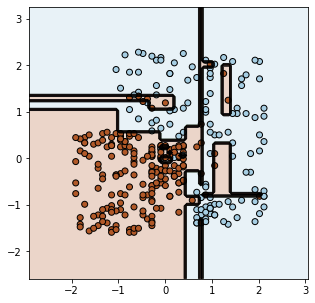

In [89]:
plot_decision_boundary(dt, X_train.values, y_train.values)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


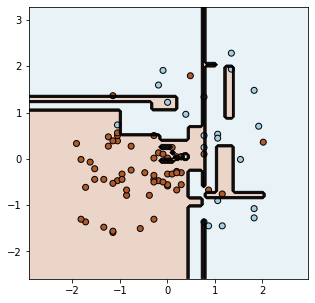

In [90]:
plot_decision_boundary(dt, X_test.values, y_test.values)

In [91]:
#Accuracy of the model
#As this is classifier algorithm, AUROC is the best evaluation metrics
from sklearn.metrics import accuracy_score, roc_auc_score

acc = accuracy_score(y_test, y_pred)
print('The test Accuracy: {:.2f}'.format(acc))

acc = roc_auc_score(y_test, y_pred)
print('The test Accuracy: {:.2f}'.format(acc))

The test Accuracy: 0.85
The test Accuracy: 0.79


In [92]:
#Checking for overfiting and Underfitting of the model
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,50]:
  dt = DecisionTreeClassifier(max_depth=depth)

  dt.fit(X_train, y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train))

  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
  print('Depth: ', depth, 'Training Accuracy: ', trainAccuracy, 'Cross Val Score: ', np.mean(valAccuracy))

Depth:  1 Training Accuracy:  0.83125 Cross Val Score:  0.83125
Depth:  2 Training Accuracy:  0.9125 Cross Val Score:  0.90625
Depth:  3 Training Accuracy:  0.915625 Cross Val Score:  0.88125
Depth:  4 Training Accuracy:  0.93125 Cross Val Score:  0.896875
Depth:  5 Training Accuracy:  0.953125 Cross Val Score:  0.890625
Depth:  6 Training Accuracy:  0.953125 Cross Val Score:  0.8875
Depth:  7 Training Accuracy:  0.96875 Cross Val Score:  0.878125
Depth:  8 Training Accuracy:  0.975 Cross Val Score:  0.88125
Depth:  9 Training Accuracy:  0.98125 Cross Val Score:  0.878125
Depth:  10 Training Accuracy:  0.984375 Cross Val Score:  0.878125
Depth:  20 Training Accuracy:  0.99375 Cross Val Score:  0.871875
Depth:  50 Training Accuracy:  0.99375 Cross Val Score:  0.871875


In [96]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

import matplotlib.pyplot as plt
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
#X_train.shape, y_train.shape

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'X[0] <= 42.5\ngini = 0.477\nsamples = 320\nvalue = [194, 126]'),
 Text(0.25, 0.5, 'X[1] <= 90500.0\ngini = 0.314\nsamples = 226\nvalue = [182, 44]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.093\nsamples = 185\nvalue = [176, 9]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.25\nsamples = 41\nvalue = [6, 35]'),
 Text(0.75, 0.5, 'X[1] <= 41500.0\ngini = 0.223\nsamples = 94\nvalue = [12, 82]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.064\nsamples = 30\nvalue = [1, 29]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.285\nsamples = 64\nvalue = [11, 53]')]

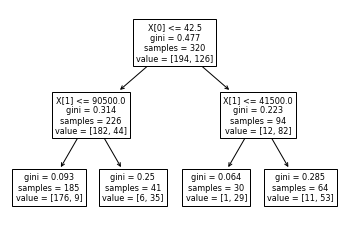

In [97]:
#Visualising the Tree
from sklearn import tree
tree.plot_tree(dt)